# Figure 5
data is stored in ../../data

# setup and load data

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from dms_3d_features.plotting import *

## extra functions

In [117]:
def assign_stack_type(row):
    if row["both_pyrimidine"]:
        return "Pyrimidine"
    elif row["both_purine"]:
        return "Purine"
    else:
        return "Mixed"

## load data

In [118]:
DATA_PATH = "../../data/"

In [119]:
df_constructs = pd.read_json(f"{DATA_PATH}/raw-jsons/constructs/pdb_library_1.json")
df_constructs_nomod = pd.read_json(
    f"{DATA_PATH}/raw-jsons/constructs/pdb_library_nomod.json"
)
df = pd.read_json(f"{DATA_PATH}/raw-jsons/residues/pdb_library_1_residues.json")
df["ln_r_data"] = np.log(df["r_data"])
df["ln_r_data"].replace(-np.inf, -9.8, inplace=True)

df = df.query("r_data_outlier == False").copy()

df_pdb = pd.read_json(f"{DATA_PATH}/raw-jsons/residues/pdb_library_1_residues_pdb.json")


df_corr = pd.read_csv(
    f"{DATA_PATH}/pdb-features/non_canonical_atom_distances_reactivity_correlation.csv"
)
df_corr_data = pd.read_csv(f"{DATA_PATH}/pdb-features/non_canonical_atom_distances.csv")
df_ratio_corr = pd.read_csv(
    f"{DATA_PATH}/pdb-features/non_canonical_atom_distances_reactivity_ratio_correlation.csv"
)
df_ratio_corr_data = pd.read_csv(
    f"{DATA_PATH}/pdb-features/non_canonical_atom_distances_with_ratio.csv"
)
# df_ratio_corr_data = pd.read_csv(
#    f"../../not_in_repo/data_bak/pdb-features/non_canonical_atom_distances_with_ratio.csv.bak"
# )

/opt/homebrew/Caskroom/miniconda/base/envs/py3/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/lg/b_1r07zd7174kpbyfysdr7p0dxd870/T/ipykernel_84799/27104743.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ln_r_data"].replace(-np.inf, -9.8, inplace=True)


# Plotting 

## Figure 5a

0.5068710179916276

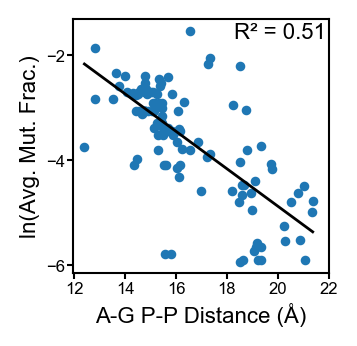

In [120]:
def plot_ag_pp_distance_vs_ln_mut_frac(df, ax):
    """
    Plots A-G P-P distance vs ln(Avg. Mut. Frac.) on the given Axes.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        ax (matplotlib.axes.Axes): The axes to plot on.

    Returns:
        float: R^2 value from the regression.
    """
    df_corr_data_ag = df.query('pair == "A-G" and atom1 == "P" and atom2 == "P"').copy()
    df_corr_data_ag.sort_values(by="distance", ascending=False, inplace=True)
    r2 = scatter_plot_w_regression(df_corr_data_ag, ax, "distance", "ln_r_data_mean")
    ax.set_xlabel("A-G P-P Distance (Å)", labelpad=2)
    ax.set_ylabel("ln(Avg. Mut. Frac.)", labelpad=2)
    ax.set_xticks([12, 14, 16, 18, 20, 22])
    publication_style_ax(ax)
    return r2


fig, ax = plt.subplots(figsize=(1.65, 1.65), dpi=200)
plot_ag_pp_distance_vs_ln_mut_frac(df_corr_data, ax)

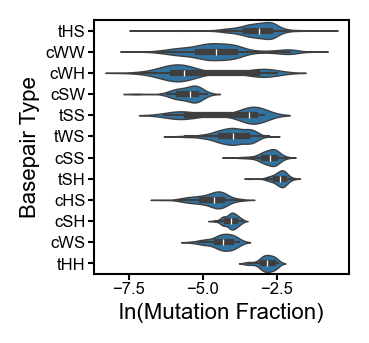

In [121]:
def plot_violin_ln_mut_frac_vs_bp_type(df, ax):
    """
    Plots a violin plot of ln(Mutation Fraction) vs Basepair Type for A-G, NON-WC, single interaction.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        ax (matplotlib.axes.Axes): The axes to plot on.

    Returns:
        None
    """
    df_pdb_ag = df.query(
        "r_nuc == 'A' and r_type == 'NON-WC' and pdb_r_pair == 'A-G' and no_of_interactions == 1"
    ).copy()
    sns.violinplot(
        data=df_pdb_ag,
        y="pdb_r_bp_type",
        x="ln_r_data",
        density_norm="width",
        ax=ax,
        linewidth=0.5,
    )
    ax.set_xlabel("ln(Mutation Fraction)", labelpad=2)
    ax.set_ylabel("Basepair Type", labelpad=2)
    publication_style_ax(ax)


# Example usage:
fig, ax = plt.subplots(figsize=(1.65, 1.65), dpi=200)
plot_violin_ln_mut_frac_vs_bp_type(df_pdb, ax)

<Axes: >

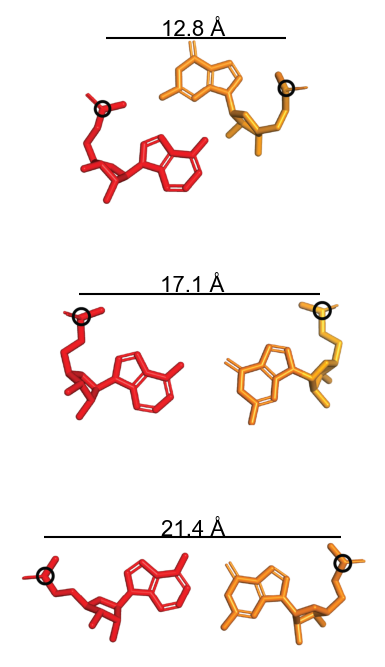

In [122]:
def plot_figure_5b_image_with_annotations(ax, image_path):
    """
    Plots the annotated image for Figure 5b with distance labels and horizontal lines.

    Args:
        image_path (str): Path to the image file.

    Returns:
        tuple: (fig, ax) matplotlib Figure and Axes objects.
    """
    load_and_fit_image_to_subplot(image_path, ax)

    # Add distance annotations and horizontal lines
    y_vals = [
        1.03,
        0.61,
        0.21,
    ]
    offset = 0.030
    annotations = [
        {
            "y_text": y_vals[0],
            "label": "12.8 Å",
            "y_line": y_vals[0] - offset,
            "xmin": 0.25,
            "xmax": 0.77,
        },
        {
            "y_text": y_vals[1],
            "label": "17.1 Å",
            "y_line": y_vals[1] - offset,
            "xmin": 0.17,
            "xmax": 0.87,
        },
        {
            "y_text": y_vals[2],
            "label": "21.4 Å",
            "y_line": y_vals[2] - offset,
            "xmin": 0.07,
            "xmax": 0.93,
        },
    ]

    for ann in annotations:
        ax.text(
            0.5,
            ann["y_text"],
            ann["label"],
            fontsize=8,
            fontname="Arial",
            verticalalignment="top",
            horizontalalignment="center",
            transform=ax.transAxes,
        )
        ax.hlines(
            y=ann["y_line"],
            xmin=ann["xmin"],
            xmax=ann["xmax"],
            colors="black",
            linewidth=0.75,
            transform=ax.transAxes,
            clip_on=False,
        )
    return ax


# Example usage:
fig, ax = plt.subplots(figsize=(1.65 * 1.35, 3.3 * 1.35), dpi=200)
path = "../../figures/figure_5b.png"
plot_figure_5b_image_with_annotations(ax, path)

0.5139449403790018

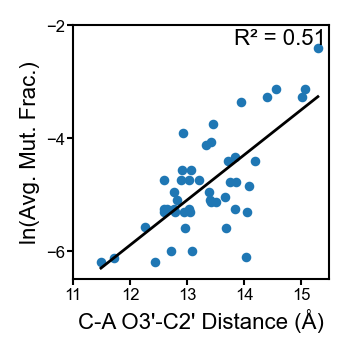

In [123]:
def plot_ca_o3_c2_distance_vs_ln_mut_frac(df, ax):
    """
    Plots a scatter plot with regression for C-A O3'-C2' distance vs ln(Avg. Mut. Frac.).

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        ax (matplotlib.axes.Axes): The axes to plot on.

    Returns:
        float: R^2 value from the regression.
    """
    df_corr_data_ca = df.query(
        'pair == "C-A" and atom1 == "O3\'" and atom2 == "C2\'"'
    ).copy()
    df_corr_data_ca.sort_values(by="distance", ascending=False, inplace=True)
    r2 = scatter_plot_w_regression(df_corr_data_ca, ax, "distance", "ln_r_data_mean")
    ax.set_xlabel("C-A O3'-C2' Distance (Å)", labelpad=2)
    ax.set_ylabel("ln(Avg. Mut. Frac.)", labelpad=2)
    ax.set_xticks([11, 12, 13, 14, 15])
    ax.set_yticks([-6, -4, -2])
    publication_style_ax(ax)
    return r2


fig, ax = plt.subplots(figsize=(1.65, 1.65), dpi=200)
plot_ca_o3_c2_distance_vs_ln_mut_frac(df_corr_data, ax)

<Axes: >

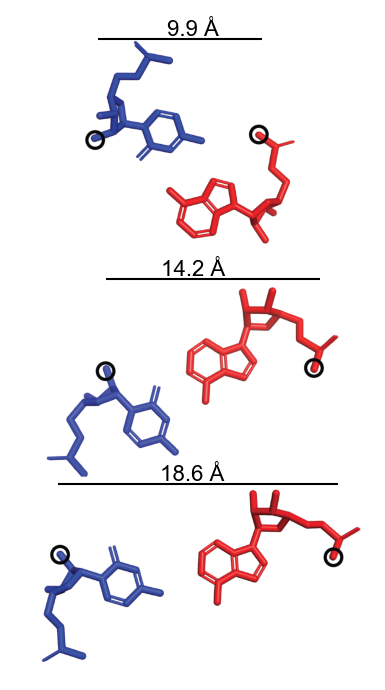

In [124]:
def plot_figure_5e_image_with_annotations(ax, image_path):
    """
    Plots the annotated image for Figure 5e with distance labels and horizontal lines.

    Args:
        image_path (str): Path to the image file.

    Returns:
        tuple: (fig, ax) matplotlib Figure and Axes objects.
    """
    load_and_fit_image_to_subplot(image_path, ax)

    # Add distance annotations and horizontal lines
    y_vals = [
        1.03,
        0.65,
        0.325,
    ]
    offset = 0.030
    annotations = [
        {
            "y_text": y_vals[0],
            "label": "9.9 Å",
            "y_line": y_vals[0] - offset,
            "xmin": 0.225,
            "xmax": 0.70,
        },
        {
            "y_text": y_vals[1],
            "label": "14.2 Å",
            "y_line": y_vals[1] - offset,
            "xmin": 0.25,
            "xmax": 0.87,
        },
        {
            "y_text": y_vals[2],
            "label": "18.6 Å",
            "y_line": y_vals[2] - offset,
            "xmin": 0.11,
            "xmax": 0.92,
        },
    ]

    for ann in annotations:
        ax.text(
            0.5,
            ann["y_text"],
            ann["label"],
            fontsize=8,
            fontname="Arial",
            verticalalignment="top",
            horizontalalignment="center",
            transform=ax.transAxes,
        )
        ax.hlines(
            y=ann["y_line"],
            xmin=ann["xmin"],
            xmax=ann["xmax"],
            colors="black",
            linewidth=0.75,
            transform=ax.transAxes,
            clip_on=False,
        )
    return ax


# Example usage:
fig, ax = plt.subplots(figsize=(1.65 * 1.35, 3.3 * 1.35), dpi=200)
path = "../../figures/figure_5e.png"
plot_figure_5e_image_with_annotations(ax, path)

0.6365635588287752

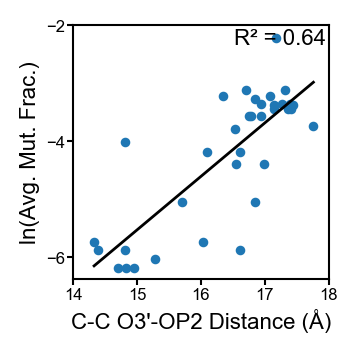

In [125]:
def plot_cc_o3_op2_distance_vs_ln_mut_frac(df, ax):
    """
    Plots a scatter plot with regression for C-C O3'-OP2' distance vs ln(Avg. Mut. Frac.).

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        ax (matplotlib.axes.Axes): The axes to plot on.

    Returns:
        float: R^2 value from the regression.
    """
    df_corr_data_cc = df.query(
        'pair == "C-C" and atom1 == "O3\'" and atom2 == "OP2"'
    ).copy()
    df_corr_data_cc.sort_values(by="distance", ascending=False, inplace=True)
    r2 = scatter_plot_w_regression(df_corr_data_cc, ax, "distance", "ln_r_data_mean")
    ax.set_xlabel("C-C O3'-OP2 Distance (Å)", labelpad=2)
    ax.set_ylabel("ln(Avg. Mut. Frac.)", labelpad=2)
    ax.set_xticks([14, 15, 16, 17, 18])
    ax.set_yticks([-6, -4, -2])
    publication_style_ax(ax)
    return r2


fig, ax = plt.subplots(figsize=(1.65, 1.65), dpi=200)
plot_cc_o3_op2_distance_vs_ln_mut_frac(df_corr_data, ax)

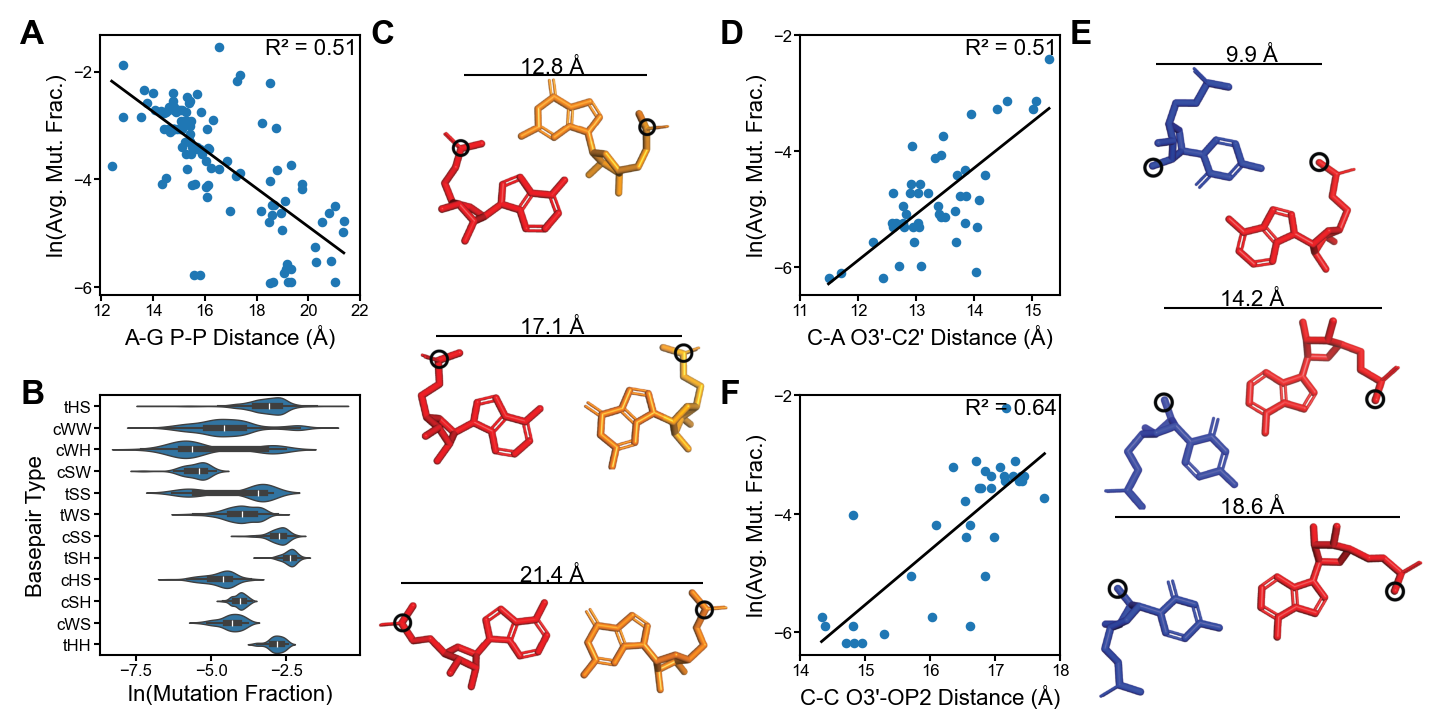

In [126]:
fig_size = (7, 4)
layout = (2, 4)
subplot_size = (1.3, 1.3)  # Each subplot is 4" x 3"
spacing = {
    "hspace": 0.45,  # horizontal spacing in inches
    "wspace": 0.50,  # vertical spacing in inches
    "margins": {"left": 0.30, "right": 0.0, "top": 0.0, "bottom": 0.70},
}
fig = plt.figure(figsize=fig_size, dpi=200)
coords_list = calculate_subplot_coordinates(fig_size, layout, subplot_size, spacing)
coords_list = merge_neighboring_coords(coords_list, [1, 5])
coords_list = merge_neighboring_coords(coords_list, [3, 6])
coords_list = [
    coords_list[0],
    coords_list[4],
    coords_list[1],
    coords_list[2],
    coords_list[3],
    coords_list[5],
]

axes = []
for coord in coords_list:
    if coord == coords_list[2] or coord == coords_list[4]:
        adjusted_coords = adjust_subplot_size(coord, 1.35)
        adjusted_coords = shift_subplot_center(adjusted_coords, dx=-0.020, dy=-0.050)
        ax = fig.add_axes(adjusted_coords)
    else:
        ax = fig.add_axes(coord)
    axes.append(ax)

plot_ag_pp_distance_vs_ln_mut_frac(df_corr_data, axes[0])
plot_violin_ln_mut_frac_vs_bp_type(df_pdb, axes[1])

plot_figure_5b_image_with_annotations(axes[2], "../../figures/figure_5b.png")

plot_ca_o3_c2_distance_vs_ln_mut_frac(df_corr_data, axes[3])

plot_figure_5e_image_with_annotations(axes[4], "../../figures/figure_5e.png")

plot_cc_o3_op2_distance_vs_ln_mut_frac(df_corr_data, axes[5])


add_subplot_labels(fig, coords_list)
fig.savefig("../../figures/figure_5.png", dpi=600, bbox_inches="tight")